Ulangilah tahapan klasifikasi menggunakan dataset wine, pima indian diabetes, breast cancer. 
Hitunglah akurasinya berdasar confusion matrix dengan pesentase data testing 20%, 30%, dan 40%

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [2]:
data_wine = load_wine()
wine = pd.DataFrame(data_wine.data)
print('Featured Name : ', data_wine.feature_names)
print('Featured Shape : ', data_wine.data.shape)
print('Dataset :\n', wine.head())

Featured Name :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Featured Shape :  (178, 13)
Dataset :
       0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
1  1050.0  
2  1185.0  
3  1480.0  
4   735.0  


In [3]:
k = wine.values[:,:13]
l = data_wine.target

k_train1, k_test1, l_train1, l_test1 = train_test_split(k, l, test_size=0.2, random_state=100)
k_train2, k_test2, l_train2, l_test2 = train_test_split(k, l, test_size=0.3, random_state=100)
k_train3, k_test3, l_train3, l_test3 = train_test_split(k, l, test_size=0.4, random_state=100)

classy = DecisionTreeClassifier(random_state = 100)
classy.fit(k_train1, l_train1)
classy.fit(k_train2, l_train2)
classy.fit(k_train3, l_train3)

k_predict1 = classy.predict(k_test1)
k_predict2 = classy.predict(k_test2)
k_predict3 = classy.predict(k_test3)

print('Data test 20% :\n', k_predict1)
print('Data test 30% :\n', k_predict2)
print('Data test 40% :\n', k_predict3)

Data test 20% :
 [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1]
Data test 30% :
 [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1 1
 1 2 2 0 1 2 2 0 2 2 2 0 0 0 1 0 1]
Data test 40% :
 [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1 1
 1 2 2 0 1 2 2 0 2 2 2 0 0 0 1 0 1 2 2 0 0 1 1 0 2 0 1 1 2 1 0 0 1 0 0]


Text Representation :
 |--- feature_12 <= 760.00
|   |--- feature_6 <= 1.27
|   |   |--- feature_10 <= 1.00
|   |   |   |--- class: 2
|   |   |--- feature_10 >  1.00
|   |   |   |--- class: 1
|   |--- feature_6 >  1.27
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_1 <= 2.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.12
|   |   |   |   |--- class: 0
|--- feature_12 >  760.00
|   |--- feature_6 <= 1.61
|   |   |--- feature_6 <= 0.90
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.90
|   |   |   |--- class: 1
|   |--- feature_6 >  1.61
|   |   |--- class: 0



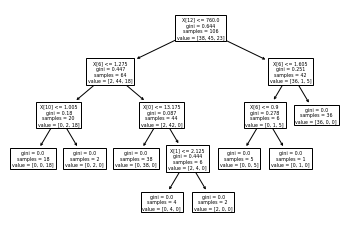

In [4]:
tree.plot_tree(classy)
text_rep = tree.export_text(classy)
print('Text Representation :\n', text_rep)

In [5]:
print('Data test 20% : ')
k_pred = classy.predict(k_test1)
print('confusion matrix :\n', confusion_matrix(l_test1, k_pred))
print('accuracy score : {:.2f}\n'.format(accuracy_score(l_test1, k_pred)))

print('Data test 30% : ')
k_pred2 = classy.predict(k_test2)
print('confusion matrix :\n', confusion_matrix(l_test2, k_pred2))
print('accuracy score : {:.2f}\n'.format(accuracy_score(l_test2, k_pred2)))

print('Data test 40% : ')
k_pred3 = classy.predict(k_test3)
print('confusion matrix :\n', confusion_matrix(l_test3, k_pred3))
print('accuracy score : {:.2f}\n'.format(accuracy_score(l_test3, k_pred3)))

Data test 20% : 
confusion matrix :
 [[ 8  0  0]
 [ 2 11  2]
 [ 1  3  9]]
accuracy score : 0.78

Data test 30% : 
confusion matrix :
 [[14  0  0]
 [ 2 15  2]
 [ 1  4 16]]
accuracy score : 0.83

Data test 40% : 
confusion matrix :
 [[21  0  0]
 [ 3 21  2]
 [ 1  4 20]]
accuracy score : 0.86



In [6]:
data_diabet = pd.read_csv('../../../../../diabetes.csv')
print(data_diabet.to_string())
print('Dataset :\n', data_diabet.shape)
# diabetes = pd.DataFrame(data_diabet.data)
# print('Featured Name : ', data_diabet.feature_names)
# print('Featured Shape : ', data_diabet.data.shape)
# print('Dataset :\n', diabetes)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

In [7]:
m = data_diabet.values[:,:8]
n = data_diabet.values[:,8]

m_train1, m_test1, n_train1, n_test1 = train_test_split(m, n, test_size=0.2, random_state=100)
m_train2, m_test2, n_train2, n_test2 = train_test_split(m, n, test_size=0.3, random_state=100)
m_train3, m_test3, n_train3, n_test3 = train_test_split(m, n, test_size=0.4, random_state=100)

classy = DecisionTreeClassifier(random_state = 100)
classy.fit(m_train1, n_train1)
classy.fit(m_train2, n_train2)
classy.fit(m_train3, n_train3)

m_pready1 = classy.predict(m_test1)
m_pready2 = classy.predict(m_test2)
m_pready3 = classy.predict(m_test3)

print('Data test 20% :\n', m_pready1)
print('Data test 30% :\n', m_pready2)
print('Data test 40% :\n', m_pready3)

Data test 20% :
 [0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
Data test 30% :
 [0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 

Text Representation :
 |--- feature_1 <= 127.50
|   |--- feature_7 <= 32.50
|   |   |--- feature_0 <= 6.50
|   |   |   |--- feature_5 <= 30.95
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_5 >  30.95
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |   |--- feature_5 <= 31.30
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_5 >  31.30
|   |   |   |   |   |   |   |--- feature_5 <= 49.05
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_5 >  49.05
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |--- feature_5 <= 34.05
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_5 >  34.05
|   |   |   |   |   |   |   |--- feature_4 <= 203.00
|   |  

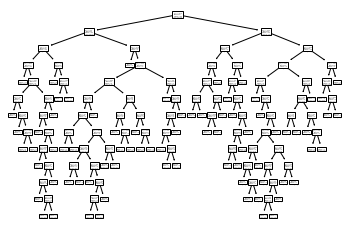

In [8]:
tree.plot_tree(classy)
text_rep = tree.export_text(classy)
print('Text Representation :\n', text_rep)

In [9]:
print('Data test 20% : ')
m_pred = classy.predict(m_test1)
print('confusion matrix :\n', confusion_matrix(n_test1, m_pred))
print('accuracy score : {:.2f}\n'.format(accuracy_score(n_test1, m_pred)))

print('Data test 30% : ')
m_pred2 = classy.predict(m_test2)
print('confusion matrix :\n', confusion_matrix(n_test2, m_pred2))
print('accuracy score : {:.2f}\n'.format(accuracy_score(n_test2, m_pred2)))

print('Data test 40% : ')
m_pred3 = classy.predict(m_test3)
print('confusion matrix :\n', confusion_matrix(n_test3, m_pred3))
print('accuracy score : {:.2f}\n'.format(accuracy_score(n_test3, m_pred3)))

Data test 20% : 
confusion matrix :
 [[76 25]
 [22 31]]
accuracy score : 0.69

Data test 30% : 
confusion matrix :
 [[110  40]
 [ 29  52]]
accuracy score : 0.70

Data test 40% : 
confusion matrix :
 [[149  47]
 [ 39  73]]
accuracy score : 0.72



In [10]:
data_cancer = load_breast_cancer()
cancer = pd.DataFrame(data_cancer.data)
print('Featured Name : ', data_cancer.feature_names)
print('Featured Shape : ', data_cancer.data.shape)
print('Dataset :\n', cancer.head())

Featured Name :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Featured Shape :  (569, 30)
Dataset :
       0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   

In [11]:
r = cancer.values[:,:30]
s = data_cancer.target

r_train1, r_test1, s_train1, s_test1 = train_test_split(r, s, test_size=0.2, random_state=100)
r_train2, r_test2, s_train2, s_test2 = train_test_split(r, s, test_size=0.3, random_state=100)
r_train3, r_test3, s_train3, s_test3 = train_test_split(r, s, test_size=0.4, random_state=100)

classy = DecisionTreeClassifier(random_state = 100)
classy.fit(r_train1, s_train1)
classy.fit(r_train2, s_train2)
classy.fit(r_train3, s_train3)

s_pready1 = classy.predict(r_test1)
s_pready2 = classy.predict(r_test2)
s_pready3 = classy.predict(r_test3)

print('Data test 20% :\n', s_pready1)
print('Data test 30% :\n', s_pready2)
print('Data test 40% :\n', s_pready3)

Data test 20% :
 [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1]
Data test 30% :
 [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1]
Data test 40% :
 [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1

Text Representation :
 |--- feature_27 <= 0.14
|   |--- feature_13 <= 36.47
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_21 <= 33.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  33.10
|   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |--- class: 1
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_18 <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  0.01
|   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |--- class: 1
|   |--- feature_13 >  36.47
|   |   |--- feature_21 <= 22.76
|   |   |   |--- class: 1
|   |   |--- feature_21 >  22.76
|   |   |   |--- feature_4 <= 0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.08
|   |   |   |   |--- class: 0
|--- feature_27 >  0.14
|   |--- feature_23 <= 710.20
|   |   |--- feature_27 <= 0.18
|   |   |   |--- clas

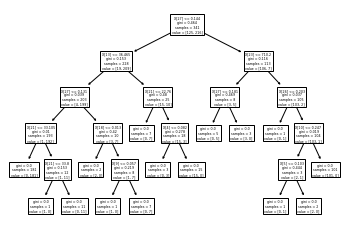

In [12]:
tree.plot_tree(classy)
text_rep = tree.export_text(classy)
print('Text Representation :\n', text_rep)

In [13]:
print('Data test 20% : ')
r_pred = classy.predict(r_test1)
print('confusion matrix :\n', confusion_matrix(s_test1, r_pred))
print('accuracy score : {:.2f}\n'.format(accuracy_score(s_test1, r_pred)))

print('Data test 30% : ')
r_pred2 = classy.predict(r_test2)
print('confusion matrix :\n', confusion_matrix(s_test2, r_pred2))
print('accuracy score : {:.2f}\n'.format(accuracy_score(s_test2, r_pred2)))

print('Data test 40% : ')
r_pred3 = classy.predict(r_test3)
print('confusion matrix :\n', confusion_matrix(s_test3, r_pred3))
print('accuracy score : {:.2f}\n'.format(accuracy_score(s_test3, r_pred3)))

Data test 20% : 
confusion matrix :
 [[43  6]
 [ 3 62]]
accuracy score : 0.92

Data test 30% : 
confusion matrix :
 [[60  9]
 [ 5 97]]
accuracy score : 0.92

Data test 40% : 
confusion matrix :
 [[ 77  10]
 [  8 133]]
accuracy score : 0.92

